In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
df = pd.read_csv('data/title_abstract.csv')

In [27]:
df.tail()

,Unnamed: 0,title,abstract
299996,299996,Distributed Web2.0 crawling for ontology evolu...,NaN
299997,299997,Human activity modeling by spatio temporal tex...,We propose to model the human activity in spac...
299998,299998,Usable verification of object-oriented program...,With formal techniques becoming more and more ...
299999,299999,Utilisation de SysML pour la modélisation des ...,NaN
300000,300000,Putting the users center stage: role playing a...,This paper sums up lessons learned from a sequ...


In [34]:
df=df[:10000]

In [40]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(df['abstract'].values.astype('U'))
text = tfidf.transform(df['abstract'].values.astype('U'))

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


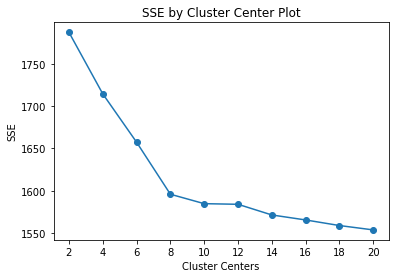

In [41]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [42]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

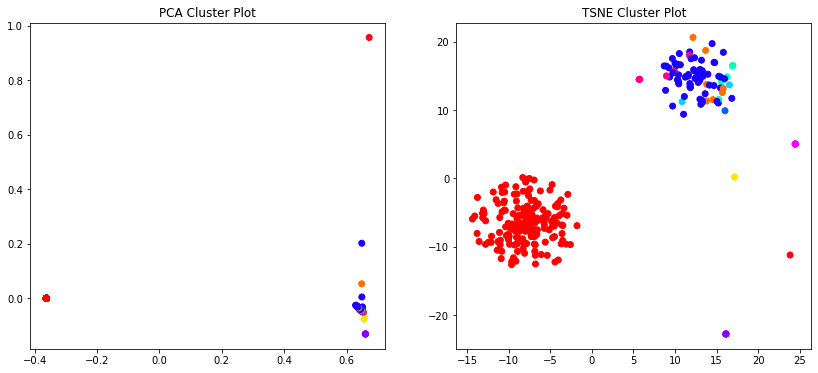

In [43]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [44]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
equal,equally,equation,equational,equations,equilibrium,equipment,equipped,über,nan

Cluster 1
sound,learning,year,short,animation,book,music,research,work,film

Cluster 2
equational,equations,equilibrium,equipment,equipped,equivalence,environmental,über,article,page

Cluster 3
different,sounds,universe,years,zero,group,column,discover,small,island

Cluster 4
values,shared,number,lines,open,source,resources,computing,balance,grid

Cluster 5
carry,depends,publications,assistance,items,fresh,dr,farkas,forthcoming,editor

Cluster 6
www,http,computer,society,engineering,systems,international,ieee,conference,software

Cluster 7
science,ieee,computer,held,systems,conference,section,issue,special,papers

Cluster 8
researchers,message,welcome,practitioners,listing,provides,proceedings,events,upcoming,conference

Cluster 9
world,used,systems,using,based,information,time,new,data,paper

Cluster 10
equational,equations,equilibrium,equipment,equipped,equivalence,environment,über,zusamme